<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/kde_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from sklearn.base import BaseEstimator, ClassifierMixin

sns.set()

In [7]:
# 単純ではないベイズ分類器
class KDEClassifier(BaseEstimator, ClassifierMixin):
  """Bayesian generative classification based on KDE

  Parameters
  ---------
  bandwodth: float
    the kernel bandwidth within each class
  kernel: str
    the kernel name, passed to KernelDensity
  """
  def __init__(self, bandwidth=1.0, kernel='gaussian'):
    self.bandwidth = bandwidth
    self.kernel = kernel

  def fit(self, X, y):
    self.classes_ = np.sort(np.unique(y))
    training_sets = [X[y == yi] for yi in self.classes_]
    self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                  kernel=self.kernel).fit(Xi) for Xi in training_sets]
    self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
    return self

  def predict_proba(self, X):
    logprobs = np.array([model.score_samples(X) for model in self.models_]).T
    result = np.exp(logprobs + self.logpriors_)
    return result / result.sum(1, keepdims=True)

  def predict(self, X):
    return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

digits = load_digits()

bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
grid.fit(digits.data, digits.target)

scores = grid.cv_results_['mean_test_score'].tolist()

{'bandwidth': 6.135907273413174}
accuracy =  0.9677298050139276


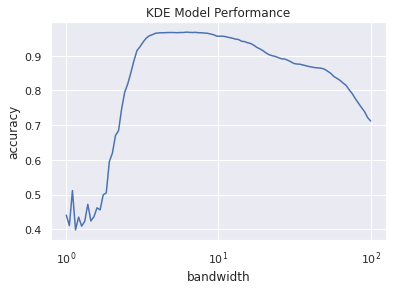

In [11]:
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')

print(grid.best_params_)
print('accuracy = ', grid.best_score_)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), digits.data, digits.target).mean()

0.8069281956050759

単純なベイズ分類器に比べて、高い認識性能を実現できた